## Chapter 6: Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

mutual_fund_data = pd.read_csv('Top100MutualFunds.csv')
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [2]:
mutual_fund_data['Morningstar Category'].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [3]:
mutual_fund_data[
    'Morningstar Rating'].value_counts(normalize = True)
mutual_fund_data.groupby('Category3').mean()

,Morningstar Rating
Category3,
Communication Services,5.000000
Health care,5.000000
Large cap,3.658824
Mid cap,4.000000
Small cap,4.000000


In [4]:
mutual_fund_data[
    'Morningstar Rating'].value_counts(normalize = True)

3.0    0.432990
4.0    0.350515
5.0    0.195876
2.0    0.020619
Name: Morningstar Rating, dtype: float64

In [5]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
mutual_fund_dict = {}
symbols = list(mutual_fund_data['Symbol'])
start = datetime(1980,1,1)
end = datetime(2020, 1, 1)
print((start, end, symbols))


(datetime.datetime(1980, 1, 1, 0, 0), datetime.datetime(2020, 1, 1, 0, 0), ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX'])


In [6]:
yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end)

[*********************100%***********************]  100 of 100 completed


In [7]:
close_data = fund_data['Adj Close']
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730548,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733575,...,0.580033,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751739,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097603,43.498634,33.953678,41.269051,41.468189,28.316502,28.111412,38.230671,38.514618,51.184906,...,42.597168,80.298599,43.188065,32.569065,106.341019,29.883801,43.968906,14.698989,29.131348,36.265896
2019-12-26,38.185303,43.719612,34.099621,41.387012,41.586231,28.408520,28.203419,38.318684,38.603233,51.416248,...,42.654209,80.374329,43.536552,32.785183,107.248009,30.146879,44.383232,14.812883,29.243479,36.535660
2019-12-27,38.211609,43.711113,34.099621,41.441456,41.640713,28.400158,28.186693,38.345085,38.629826,51.465828,...,42.504475,80.290176,43.512787,32.761166,107.316467,30.130440,44.357864,14.819583,29.243479,36.501934


In [8]:
close_data['S&P 500'] = web.get_data_yahoo(
    '^GSPC', start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


/var/folders/7l/h6dgk4zj46v592scp_p1cgwr0000gn/T/ipykernel_79175/2952228038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data['S&P 500'] = web.get_data_yahoo(


In [9]:
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897,105.760002
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897,105.220001
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730548,...,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897,106.519997
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733575,...,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897,106.809998
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751739,...,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097603,43.498634,33.953678,41.269051,41.468189,28.316502,28.111412,38.230671,38.514618,51.184906,...,80.298599,43.188065,32.569065,106.341019,29.883801,43.968906,14.698989,29.131348,36.265896,3223.379883
2019-12-26,38.185303,43.719612,34.099621,41.387012,41.586231,28.408520,28.203419,38.318684,38.603233,51.416248,...,80.374329,43.536552,32.785183,107.248009,30.146879,44.383232,14.812883,29.243479,36.535660,3239.909912
2019-12-27,38.211609,43.711113,34.099621,41.441456,41.640713,28.400158,28.186693,38.345085,38.629826,51.465828,...,80.290176,43.512787,32.761166,107.316467,30.130440,44.357864,14.819583,29.243479,36.501934,3240.020020


<AxesSubplot:xlabel='Date'>

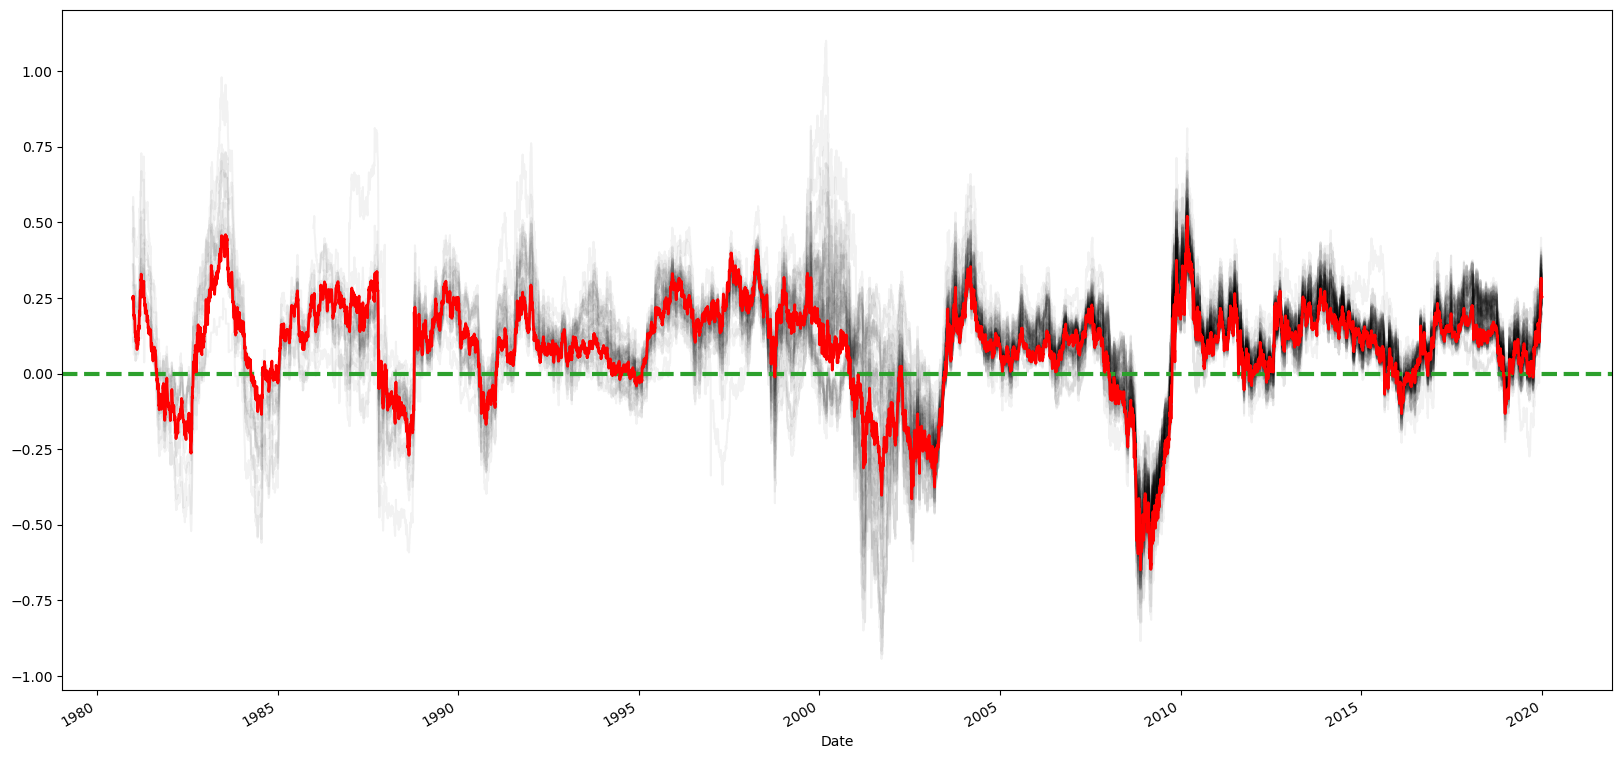

In [10]:
import matplotlib.pyplot as plt
# YOY is easy data to interpret
yoy_return = np.log(close_data).diff(251)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(
    legend = False, color = 'k', alpha = .05, ax = ax)
ax.axhline(0, ls = "--", color = 'C2', linewidth = 3)
yoy_return['S&P 500'].plot.line(
    color = 'Red', linewidth = 2, ax = ax)

Text(0.5, 1.0, 'Index Returns Relative to Market Return')

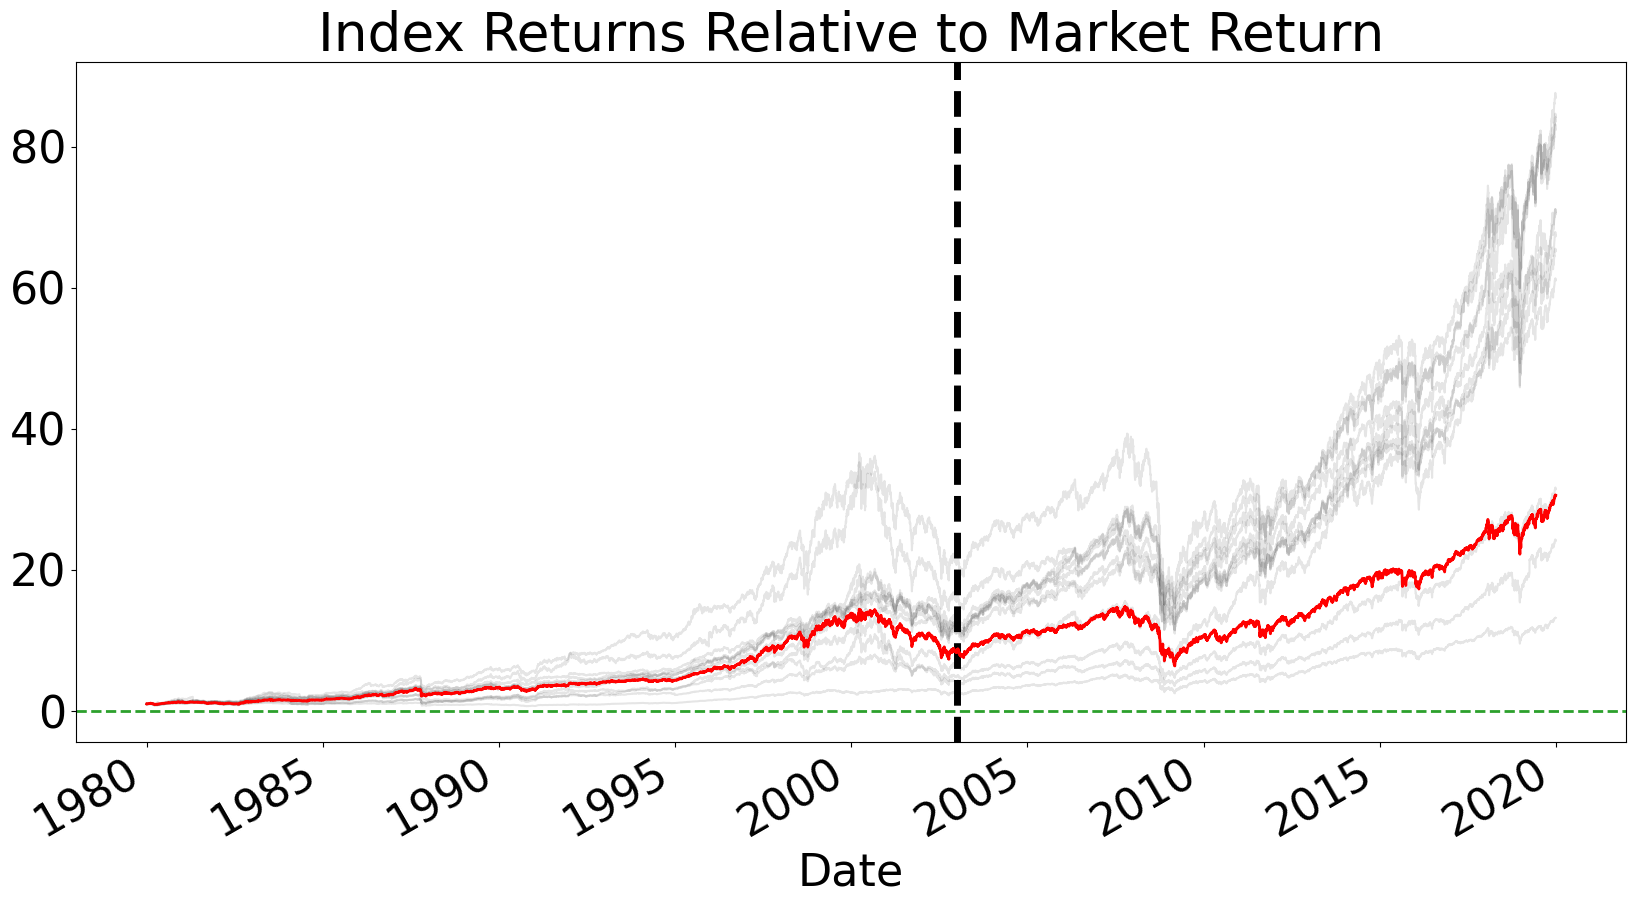

In [18]:
norm_data = close_data.div(close_data.iloc[0])
fig, ax = plt.subplots(figsize = (20,10))
norm_data.plot.line(legend = False, color = "k", alpha = .1, ax = ax)
ax.axhline(0, ls = "--", color = "C2",linewidth = 2)
ax.axvline("2003", ls = "--", color = "k",linewidth = 5)

norm_data["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
plt.rcParams.update({'font.size': 32})
ax.set_title("Index Returns Relative to Market Return")

In [20]:
# for year in range(1980,2021):
#    year = str(year)
#    print(close_data.loc[str(year)].shape[0])

In [22]:
monthly_close_data = close_data.resample('M').first()
monthly_close_data.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,35.126400,39.759945,30.990507,39.542530,39.713707,25.792032,25.624296,35.268578,35.559998,46.166386,...,76.018021,40.260960,30.476660,99.783806,27.435656,39.930309,13.367849,26.328794,33.576424,2953.560059
2019-09-30,35.185398,38.784580,30.445385,40.388554,40.560371,25.256035,25.087618,35.319347,35.611183,45.121578,...,74.580856,39.150581,30.370665,97.703735,26.914335,38.901054,13.186357,25.675350,32.912346,2906.270020
2019-10-31,35.645611,38.633915,30.624960,39.771660,39.951832,25.128033,24.959454,35.779800,36.065327,45.679512,...,73.918167,39.294098,29.346062,96.186310,26.883211,39.103664,13.086224,26.262714,32.483128,2940.250000
2019-11-30,36.493103,40.663937,31.833960,40.644119,40.824951,26.328030,26.144949,36.630489,36.913811,48.072178,...,76.337395,40.850151,30.045624,100.013977,28.065918,41.202702,13.774644,27.672400,33.916561,3066.909912
2019-12-31,36.976170,41.718601,32.544640,40.555992,40.745579,27.064035,26.873865,37.106869,37.385201,49.166874,...,77.942230,41.703712,31.162085,102.793091,28.867355,42.458881,14.081302,28.127607,34.872189,3113.870117


In [23]:
monthly_returns = np.log(monthly_close_data).diff()
monthly_returns.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005503,-0.012486,-0.008626,0.016176,0.016344,-0.015695,-0.016124,-0.005741,-0.005979,-0.009414,...,-0.004088,0.003006,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003611,-0.003640
2019-09-30,0.001678,-0.024837,-0.017747,0.021170,0.021095,-0.021000,-0.021167,0.001438,0.001438,-0.022891,...,-0.019087,-0.027967,-0.003484,-0.021066,-0.019184,-0.026114,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012953,0.012672,0.012289,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023497,0.051211,0.038718,0.021700,0.021619,0.046650,0.046403,0.023497,0.023254,0.051054,...,0.032204,0.038836,0.023559,0.039023,0.043054,0.052288,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013150,0.025605,0.022079,-0.002171,-0.001946,0.027572,0.027498,0.012921,0.012689,0.022517,...,0.020805,0.020680,0.036485,0.027408,0.028155,0.030032,0.022018,0.016316,0.027786,0.015196


In [24]:
def t_value_1samp(data, mu):
    x_bar = np.mean(data)
    s = np.std(data)
    n = len(data)
    df = n-1
    t = (x_bar - mu)/(s/np.sqrt(n))

    return t, df

In [25]:
sp500 = monthly_returns["S&P 500"].dropna()

In [26]:
sp500.mean()*12

0.08473776816463623

In [27]:
hypothesized_rate = .07/12
hypothesized_rate

0.005833333333333334

In [28]:
t_value_1samp(data = sp500, mu= hypothesized_rate)

(0.6072595645765047, 478)

In [29]:
stats.ttest_1samp(sp500, hypothesized_rate)

Ttest_1sampResult(statistic=0.6066253507590067, pvalue=0.5443875720700815)

In [30]:
def t_value_ind_samples(a, b, hypothesized_difference=0, equal_var=False):
    
    a = np.array(a)
    b = np.array(b)
    
    s1, n1 = np.var(a) , len(a)
    s2, n2 = np.var(b),  len(b)
    
    # if paired samples, df calculation is different
    if (equal_var):
        df = n1 + n2 - 2
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
        denom = np.sqrt(vn1 + vn2)

    d = np.mean(a) - np.mean(b) - hypothesized_difference
    t = d / denom
    return t, df

In [31]:
prgfx = monthly_returns["PRGFX"].dropna()
sp500.mean(), prgfx.mean()

(0.0070614806803863525, 0.007124728778062822)

In [32]:
t_value_ind_samples(sp500, prgfx)

(-0.02122492818599556, 950.1085533159645)

# T Distribution

In [33]:
import scipy.special as sc

# define a function to create the actual distribution from which we can analyze our t value from the t test
def t_distribution(df, t): 
    t_dist_val = ((1 + t**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_dist_val

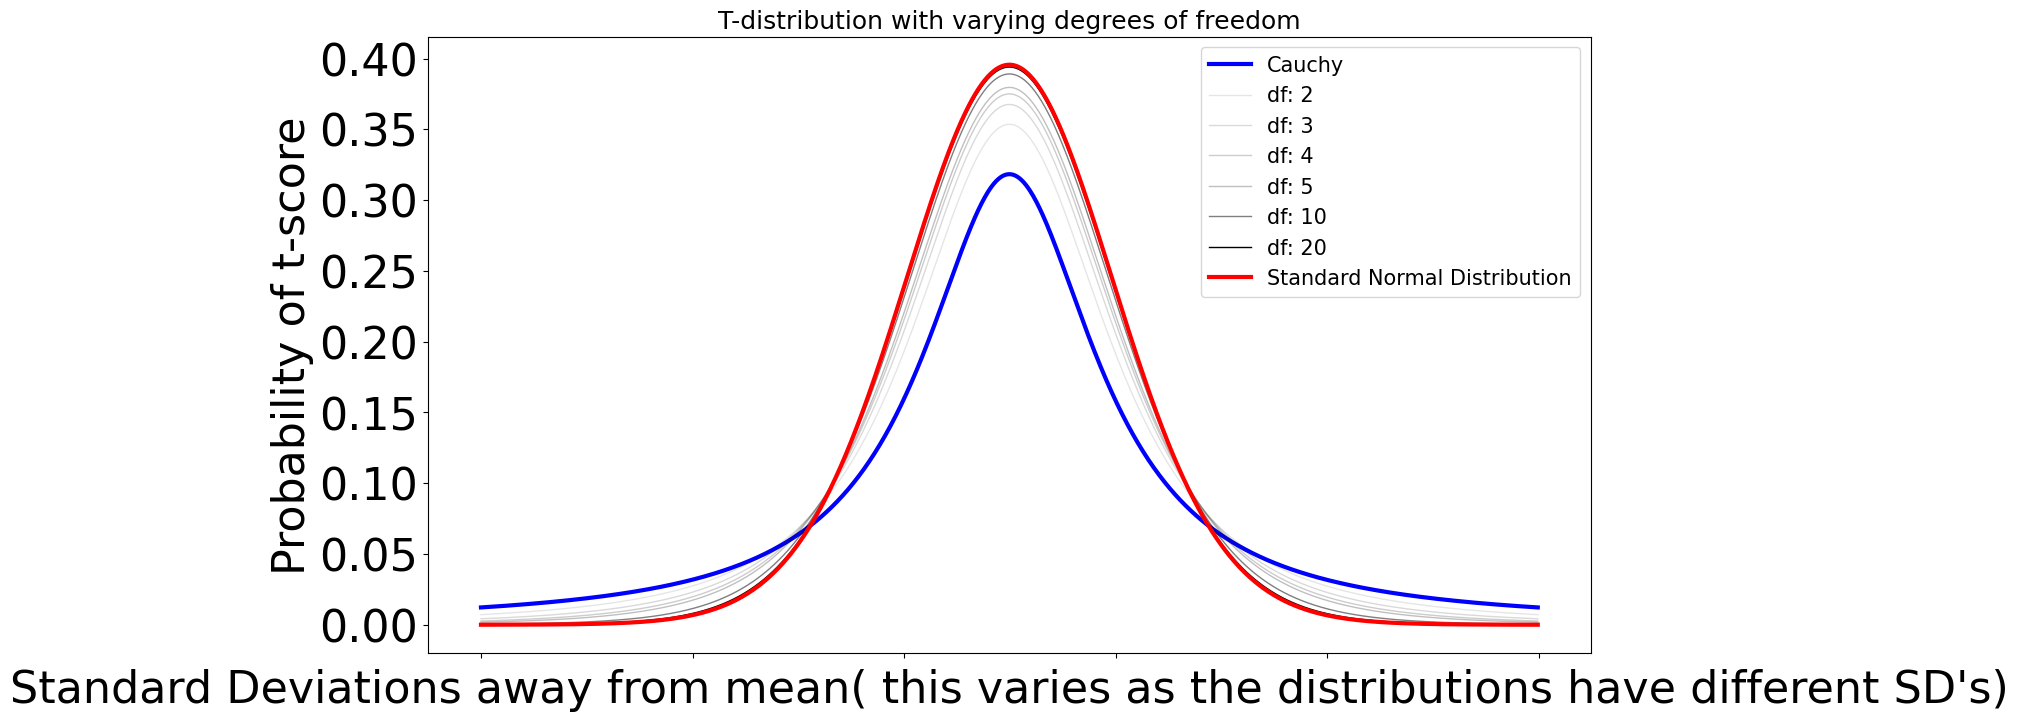

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x = np.linspace(-5, 5, 1000)
cauchy = t_distribution(1, x)
ax.plot(cauchy, '-', lw=3, alpha=1, label="Cauchy", color='b')
t_df = [2, 3, 4, 5, 10, 20]
for df in t_df:
    dist = t_distribution(df, x)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label="df: " + str(df), color='k')
gaussian = t_distribution(30, x)
ax.plot(gaussian,
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels="")
plt.legend()

In [35]:
x = np.linspace(-5,5,1000)
x

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

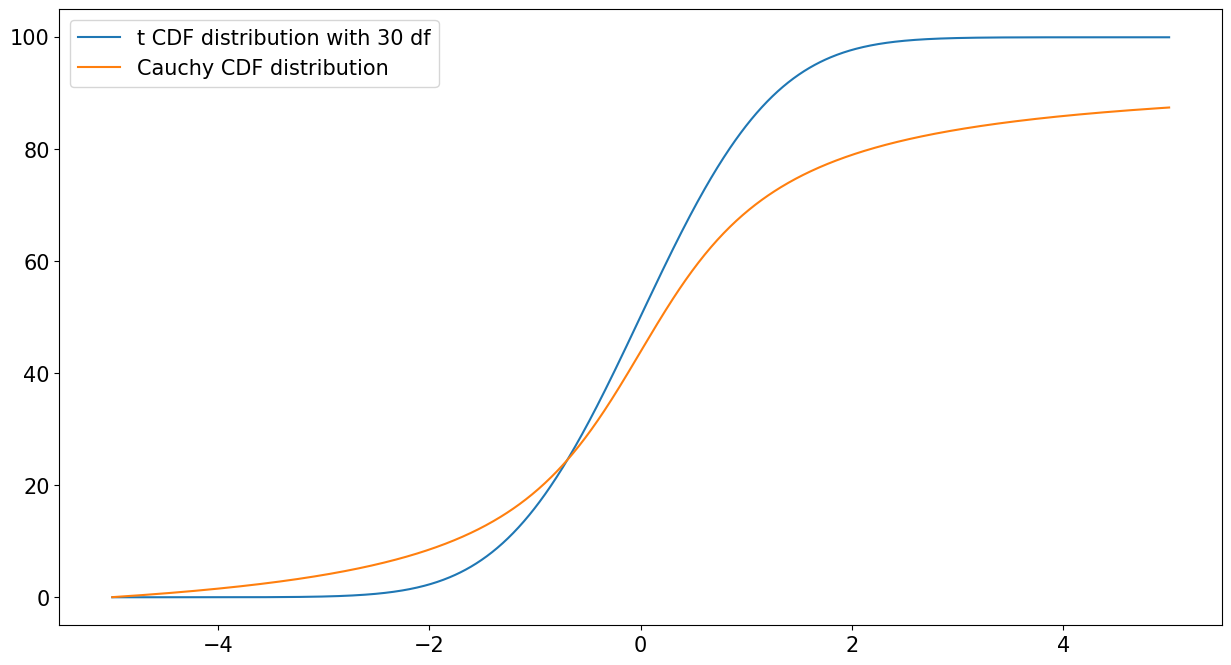

In [36]:
fig, ax = plt.subplots(figsize = (15, 8))

t_dist = t_distribution(150000, x)
cauchy = t_distribution(1,x)

f_dist = t_dist.copy()
cauchy_f_dist = cauchy.copy()

for i in range(len(x)):
    f_dist[i] += f_dist[i-1]
    cauchy_f_dist[i] += cauchy_f_dist[i-1]

ax.plot(x, f_dist, label = 't CDF distribution with 30 df')
ax.plot(x, cauchy_f_dist, label = 'Cauchy CDF distribution')

plt.legend()

In [37]:
import scipy.stats as stats

# function that allows us to evaluate the t distribution at a given t value and df
def t_test(a, b, kind):
    
    if kind == 'one_sample': 
            t_val, df = t_value_1samp(a, b)
            print (t_val, df)
    elif kind  == 'independent': 
            t_val, df = t_value_ind_samp(a, b)
    elif kind == 'paired': 
            t_val, df = t_value_ind_samp(a, b, equal_var=True)
            
    # cdf gives probability of a value at least as extreme as observed happening; for two-sided tests this is doubled
    p_value = (1-stats.t.cdf(np.abs(t_val), df-1))  *2
    
    if p_value > .05:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
    else:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."
        
    return return_string

In [38]:
hypothesized_rate = 1.07 **(1/12) - 1
t_test(sp500, hypothesized_rate, 'one_sample')

0.6958593521205105 478


'T-value: 0.6958593521205105, P-value: 0.48685580818447427, Fail to reject null hypothesis.'

### Testing for normaility

In [39]:
from stats import * 
def jarque_bera_test(series, use_sample_ks = False):
    series.dropna(inplace = True)
    print(series)
    n = series.shape[0]

    k = kurtosis(series, sample = use_sample_ks)
    s = skewness(series, sample = use_sample_ks)
    t = n / 6 * (s ** 2 + (k - 3) ** 2 / 4)

    df = n - 1
    print(k, s, t)
    p = scipy.stats.t.sf(t, df=df)
    return t, p

In [46]:
from statsmodels.stats.stattools import jarque_bera
import scipy
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

start = datetime(2012, 1 , 1)
end = datetime.today()

stock_data = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA", '^GSPC']
for key in stocks:
    stock_data[key] = web.get_data_yahoo(key, start, end)["Close"]
stock_data = pd.DataFrame(stock_data).rename(columns = {"^GSPC":"S&P500"})
price_change_data = np.log(stock_data).diff()
price_change_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MSFT,AAPL,PG,TSLA,S&P500
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.023261,0.005360,-0.000449,-0.013264,0.000188
2012-01-05,0.010167,0.011041,-0.004201,-0.021522,0.002939
2012-01-06,0.015415,0.010400,-0.002408,-0.007773,-0.002540
2012-01-09,-0.013250,-0.001587,0.004211,0.012556,0.002259
...,...,...,...,...,...
2023-04-14,-0.012848,-0.002116,-0.005086,-0.004853,-0.002072
2023-04-17,0.009253,0.000121,0.000331,0.010967,0.003301
2023-04-18,-0.001490,0.007477,0.001059,-0.014703,0.000855


In [51]:
for key, val in price_change_data.items():
    print(key)
    print("My JB Function:   ", jarque_bera_test(val))
    print("scipy JB Function:", jarque_bera(val)[:2])

NameError: name 'kurtosis' is not defined

### Confidence Intervals

In [52]:
def t_quintile(df, alpha):
    q = (1.0+alpha)/2
    a = stats.t.ppf(q, df)
    return a

In [53]:
t_quintile(len(sp500), 0.05)

0.06273964329541434

In [54]:
def confidence_interval(data, alpha):
    n = len(data)
    df = n - 1
    x_bar = np.mean(data)
    SE = np.std(data) / np.sqrt(n)
    CI_quintile = t_quintile(df, alpha)
    CI = x_bar - CI_quintile * SE, x_bar + CI_quintile * SE
    return CI

In [55]:
sp500_CI = confidence_interval(sp500, 0.05)
sp500_CI

(0.006934593241426297, 0.007188368119346408)

In [56]:
sp500_yearly_CI = (
    1+sp500_CI[0])**12, (1+sp500_CI[1])**12

In [57]:
sp500_yearly_CI

(1.0864634873490415, 1.0897538656572028)

In [58]:
yearly_close_data = pd.DataFrame(close_data).resample("Y").first()
yearly_changes = np.log(yearly_close_data).diff()
yearly_changes


,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-12-31,NaN,0.373945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.219247,...,NaN,NaN,NaN,NaN,0.444489,NaN,NaN,NaN,0.292460,0.253979
1982-12-31,NaN,-0.020714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010941,...,NaN,NaN,NaN,NaN,-0.155439,-0.012121,NaN,NaN,-0.008201,-0.105083
1983-12-31,NaN,0.192325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270906,...,NaN,NaN,NaN,NaN,0.013849,0.258291,NaN,NaN,0.181910,0.119646
1984-12-31,NaN,0.207397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250166,...,NaN,NaN,NaN,NaN,0.230555,0.247645,NaN,NaN,0.050682,0.170396
1985-12-31,NaN,-0.087750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007457,...,NaN,NaN,NaN,NaN,-0.244129,-0.258695,NaN,NaN,-0.022556,0.008075
1986-12-31,NaN,0.171686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221966,...,NaN,NaN,NaN,NaN,0.299125,0.243880,NaN,0.103741,0.230368,0.236968
1987-12-31,NaN,0.112441,0.024668,NaN,NaN,NaN,0.040800,NaN,0.121338,0.038209,...,NaN,NaN,NaN,NaN,0.496225,0.117398,NaN,0.172813,-0.087273,0.162006
1988-12-31,NaN,0.004728,0.002421,NaN,NaN,NaN,0.056241,NaN,0.017346,-0.016121,...,NaN,NaN,NaN,NaN,0.137327,0.085508,NaN,-0.001300,-0.351368,0.037784


In [59]:
yearly_return_CIs = confidence_interval(yearly_changes, 0.05)

/Users/cadebusek/Downloads/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


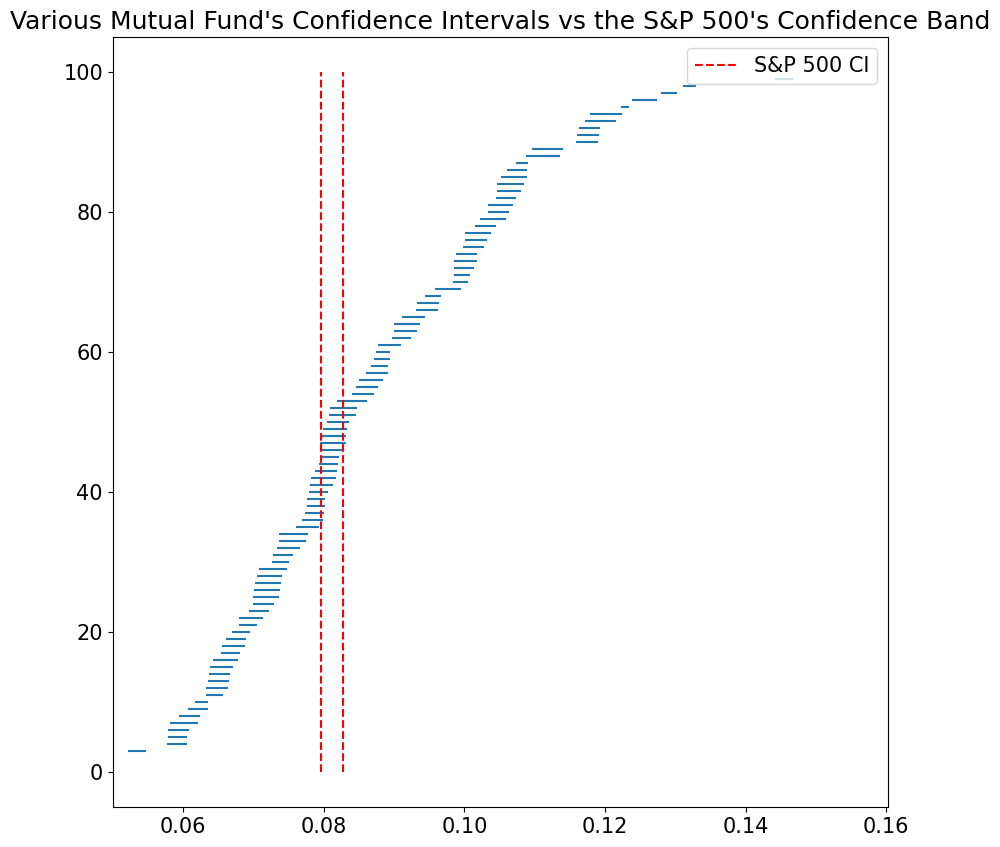

In [60]:
fig, ax = plt.subplots(figsize = (10, 10))
Y_axis = np.arange(len(yearly_return_CIs[0]))

ax.hlines(y = Y_axis, xmin = yearly_return_CIs[0].sort_values(), xmax = yearly_return_CIs[1].sort_values() )
ax.vlines(x = [yearly_return_CIs[0]["S&P 500"],yearly_return_CIs[1]["S&P 500"]], ymin = 0, ymax = 100, label = "S&P 500 CI", color="r", linestyle="--")
ax.set_title("Various Mutual Fund's Confidence Intervals vs the S&P 500's Confidence Band")
ax.set_xlim(0.05)
ax.legend()

# ANOVA

In [61]:
mutual_fund_data[['Symbol', 'Morningstar Category']]

,Symbol,Morningstar Category
0,AGTHX,Large Growth
1,FCNTX,Large Growth
2,CWMAX,Large Blend
3,CWMCX,Large Blend
4,CWMEX,Large Blend
...,...,...
95,FDTRX,Large Growth
96,FDYZX,Large Growth
97,BBVLX,Large Value
98,PEYAX,Large Value


In [63]:
mutual_fund_data["Morningstar Category"].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [65]:
fund_types = mutual_fund_data["Morningstar Category"].value_counts() > 2
relevant_fund_types = fund_types[fund_types]
relevant_funds = mutual_fund_data[
    mutual_fund_data['Morningstar Category'].isin(
    relevant_fund_types.index)]
relevant_funds



,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [69]:
relevant_fund_type_names = {}
for fund_type in relevant_fund_types.index:
    relevant_fund_type_names[fund_type] = relevant_funds[
        'Symbol'][relevant_funds["Morningstar Category"] == fund_type]



In [70]:
relevant_fund_type_names

{'Large Growth': 0     AGTHX
 1     FCNTX
 9     AMCFX
 10    CAFAX
 11    CAFCX
 12    CAFEX
 13    CAFFX
 14    FMACX
 15    TRBCX
 22    FDGRX
 23    FBGRX
 24    AMCPX
 25    EAGRX
 27    FMAGX
 28    HACAX
 30    PRGFX
 36    FOCPX
 37    CNGAX
 38    CNGCX
 39    CNGEX
 40    CNGFX
 41    FNEFX
 42    FOCKX
 48    TWCUX
 49    EGFFX
 50    EGFIX
 51    ANEFX
 61    VAFAX
 63    FCGAX
 64    FGSRX
 65    FIFRX
 70    FKGRX
 72    AULDX
 73    AULGX
 74    AULNX
 75    AULRX
 76    AULYX
 77    AKRSX
 78    MFEIX
 79    POLIX
 80    FKDNX
 82    VWUSX
 83    LSGRX
 84    SEEGX
 91    SBLYX
 92    AKRIX
 93    MFEGX
 94    FDNRX
 95    FDTRX
 96    FDYZX
 99    TWCGX
 Name: Symbol, dtype: object,
 'Large Value': 16    AFMFX
 17    AMRFX
 18    CMLAX
 19    CMLCX
 20    CMLEX
 21    CMLFX
 26    AMRMX
 43    DFLVX
 44    CDDRX
 45    CDDYX
 46    CDIRX
 47    CVIRX
 52    HLIEX
 59    DDFIX
 60    DDFRX
 66    PRFDX
 69    VWNFX
 81    MADVX
 97    BBVLX
 98    PEYAX
 Name: Symbol, d

In [71]:
fund_type_returns = {}

for key in relevant_fund_type_names.keys():
    
    fund_type_returns[key] = []
    
    for val in relevant_fund_type_names[key]:
        fund_type_returns[
            key].extend(monthly_returns[val].dropna())

In [73]:
[print(f"{key}: {np.mean(fund_type_returns[key])}") for key in fund_type_returns]

Large Growth: 0.008346027059843088
Large Value: 0.007025138462060621
Large Blend: 0.007410826034513154
Mid-Cap Growth: 0.009292540215724522


[None, None, None, None]

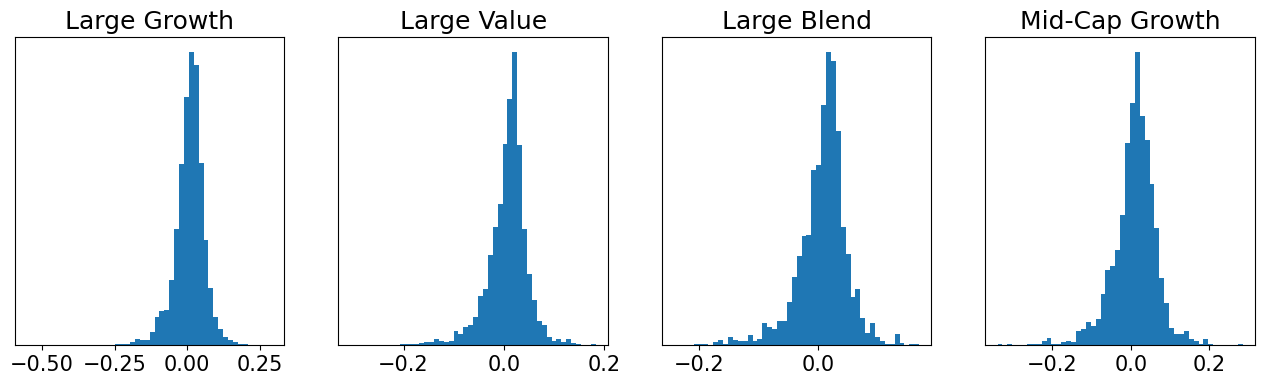

In [76]:
fig, axs = plt.subplots(1, 4 , figsize = (16, 4))
for num, key in enumerate(fund_type_returns): 
    axs[num].hist(fund_type_returns[key], bins = 50)
    axs[num].set_title(key)
    axs[num].set_yticks([])
    

In [79]:
def get_anova_counts(*args):
    k = len(args)
    N = 0
    for arg in args:
        N += len(arg)
        dfbn = k-1
        dfwn = N  - k
        
        return k, N, dfbn, dfwn

In [80]:
get_anova_counts(fund_type_returns["Large Growth"],
                 fund_type_returns['Large Value'],
                 fund_type_returns['Large Blend'],
                 fund_type_returns['Mid-Cap Growth'])

(4, 12713, 3, 12709)

In [82]:
def SSB(*args):
    ssb = 0
    alldata = np.concatenate(args)
    
    grand_mean = np.mean(alldata)
    
    for arg in args:
        group_mean = np.mean(arg)
        
        n = len(arg)
        val = n * (group_mean - grand_mean)**2
        
        ssb += val
        
    return ssb

In [83]:
SSB(fund_type_returns["Large Growth"], fund_type_returns['Large Value'],
    fund_type_returns['Large Blend'], fund_type_returns['Mid-Cap Growth'])

0.009868753341596856

In [85]:
def get_sum_square_stats(*args): 
    ssw = SSW(*args)
    ssb = SSB(*args)
    sst = ssb + ssw
    return ssw, ssb, sst

In [86]:
get_sum_square_stats(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

(53.80316050897428, 0.009868753341596856, 53.81302926231588)

In [89]:
from scipy.stats import f as f_dist
def finish_anova(f, dfwn, dfbn): 
    # use scipy to plug f-value into f distribution to return p-value
     p_value =  1 - f_dist.cdf(f, dfwn, dfbn)
    
     if p_value > .05:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
     else:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."

     return return_string

In [90]:
def anova(*args):

    k, N, dfbn, dfwn  = get_anova_counts(*args)
    
    ssw, ssb, sst = get_sum_square_stats(*args)

    msb = ssb / dfbn
    msw = ssw / dfwn
    f = msb / msw

    return finish_anova(f, dfbn, dfwn)

In [91]:
anova(fund_type_returns["Large Growth"],
      fund_type_returns['Large Value'],
      fund_type_returns['Large Blend'],
      fund_type_returns['Mid-Cap Growth'])

'F-value: 0.7770422470345043, P-value: 0.5066072695693202, Fail to reject null hypothesis.'

In [92]:
stats.f_oneway(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

F_onewayResult(statistic=1.4108308954537023, pvalue=0.23745813209928907)